In [8]:
import autosklearn

In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression, make_friedman1
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.formula.api import ols
import statsmodels.api as sm

import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

from autosklearn.regression import AutoSklearnRegressor

# Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [23]:
# helper functions
def split_df_into_xy_dataset(df, dataset_label):
    return df[df['dataset']==dataset_label]['x'], df[df['dataset']==dataset_label]['y']

In [21]:
df = sns.load_dataset('anscombe')

In [22]:
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [25]:
x1, y1 = split_df_into_xy_dataset(df, "I")
x2, y2 = split_df_into_xy_dataset(df, "II")
x3, y3 = split_df_into_xy_dataset(df, "III")
x4, y4 = split_df_into_xy_dataset(df, "IV")

# Convenience list for iterating through all datasets.
all_xy_pairs = [
    (x1, y1),
    (x2, y2),
    (x3, y3),
    (x4, y4)
]

dataset_names = ['I', 'II', 'III', 'IV']

In [27]:
# Now, run autosklearn on these! :D

In [30]:
X, y = sklearn.datasets.load_boston(return_X_y=True)
feature_types = (['numerical'] * 3) + ['categorical'] + (['numerical'] * 9)
X_train, X_test, y_train, y_test = \
    sklearn.model_selection.train_test_split(X, y, random_state=1)

automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='/tmp/autosklearn_regression_example_tmp',
    output_folder='/tmp/autosklearn_regression_example_out',
)
automl.fit(X_train, y_train, dataset_name='boston',
           feat_type=feature_types)

print(automl.show_models())
predictions = automl.predict(X_test)
print("R2 score:", sklearn.metrics.r2_score(y_test, predictions))

/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-09-24 21:33:10,398:AutoMLSMBO(1)::boston] Could not find meta-data directory /usr/local/lib/python3.6/dist-packages/autosklearn/metalearning/files/r2_regression_dense
[WARNING] [2019-09-24 21:33:10,428:EnsembleBuilder(1):boston] No models better than random - using Dummy Score!
[WARNING] [2019-09-24 21:33:10,448:EnsembleBuilder(1):boston] No models better than random - using Dummy Score!


/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty

/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty

[(0.540000, SimpleRegressionPipeline({'categorical_encoding:__choice__': 'one_hot_encoding', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'regressor:__choice__': 'random_forest', 'rescaling:__choice__': 'standardize', 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'True', 'regressor:random_forest:bootstrap': 'True', 'regressor:random_forest:criterion': 'mse', 'regressor:random_forest:max_depth': 'None', 'regressor:random_forest:max_features': 1.0, 'regressor:random_forest:max_leaf_nodes': 'None', 'regressor:random_forest:min_impurity_decrease': 0.0, 'regressor:random_forest:min_samples_leaf': 1, 'regressor:random_forest:min_samples_split': 2, 'regressor:random_forest:min_weight_fraction_leaf': 0.0, 'regressor:random_forest:n_estimators': 100, 'categorical_encoding:one_hot_encoding:minimum_fraction': 0.01},
dataset_properties={
  'task': 4,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'regression',
  's

In [31]:
ls /tmp

autosklearn_regression_example_out/  autosklearn_regression_example_tmp/


In [35]:
ls /tmp/autosklearn_regression_example_tmp/

'AutoML(1):boston.log'   smac3-output/   space.pcs


In [44]:
!rmdir --help

Usage: rmdir [OPTION]... DIRECTORY...
Remove the DIRECTORY(ies), if they are empty.

      --ignore-fail-on-non-empty
                  ignore each failure that is solely because a directory
                    is non-empty
  -p, --parents   remove DIRECTORY and its ancestors; e.g., 'rmdir -p a/b/c' is
                    similar to 'rmdir a/b/c a/b a'
  -v, --verbose   output a diagnostic for every directory processed
      --help     display this help and exit
      --version  output version information and exit

GNU coreutils online help: <http://www.gnu.org/software/coreutils/>
Report rmdir translation bugs to <http://translationproject.org/team/>
Full documentation at: <http://www.gnu.org/software/coreutils/rmdir>
or available locally via: info '(coreutils) rmdir invocation'


# Getting a model for Dataset I

In [48]:
automl_q1 = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='/tmp/autosklearn/q1_tmp2',
    output_folder='/tmp/autosklearn/q1_out2',
)

In [49]:
automl_q1.fit(x1.values.reshape(-1, 1), y1.values.reshape(-1, 1), dataset_name='quartet1')

/usr/local/lib/python3.6/dist-packages/autosklearn/automl.py:860: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Will change shape via np.ravel().
  y = self._check_y(y)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
Exception ignored in: <bound method BackendContext.__del__ of <autosklearn.util.backend.BackendContext object at 0x7f6eb8040518>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/autosklearn/util/backend.py", line 110, in __del__
    self.delete_directories(force=False)
  File "/usr/local/lib/python3.6/dist-packages/autosklearn/util/backend.py", line 119, in delete_directories
    "auto-sklearn." % self.output_directory)
ValueError: Failed to delete output dir: /tmp/autosklearn_regression_example_out because auto-sklearn did not create it. Please make sure that the specified out

[WARNING] [2019-09-24 21:42:26,813:AutoMLSMBO(1)::quartet1] Could not find meta-data directory /usr/local/lib/python3.6/dist-packages/autosklearn/metalearning/files/r2_regression_dense
[WARNING] [2019-09-24 21:42:26,844:EnsembleBuilder(1):quartet1] No models better than random - using Dummy Score!
[WARNING] [2019-09-24 21:42:26,854:EnsembleBuilder(1):quartet1] No models better than random - using Dummy Score!


/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-09-24 21:42:28,866:EnsembleBuilder(1):quartet1] No models better than random - using Dummy Score!


/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty

/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty

/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty

AutoSklearnRegressor(delete_output_folder_after_terminate=True,
           delete_tmp_folder_after_terminate=True,
           disable_evaluator_output=False, ensemble_memory_limit=1024,
           ensemble_nbest=50, ensemble_size=50, exclude_estimators=None,
           exclude_preprocessors=None, get_smac_object_callback=None,
           include_estimators=None, include_preprocessors=None,
           initial_configurations_via_metalearning=25, logging_config=None,
           ml_memory_limit=3072, output_folder='/tmp/autosklearn/q1_out2',
           per_run_time_limit=30, resampling_strategy='holdout',
           resampling_strategy_arguments=None, seed=1, shared_mode=False,
           smac_scenario_args=None, time_left_for_this_task=120,
           tmp_folder='/tmp/autosklearn/q1_tmp2')

In [50]:
print(automl.show_models())

[(0.540000, SimpleRegressionPipeline({'categorical_encoding:__choice__': 'one_hot_encoding', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'regressor:__choice__': 'random_forest', 'rescaling:__choice__': 'standardize', 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'True', 'regressor:random_forest:bootstrap': 'True', 'regressor:random_forest:criterion': 'mse', 'regressor:random_forest:max_depth': 'None', 'regressor:random_forest:max_features': 1.0, 'regressor:random_forest:max_leaf_nodes': 'None', 'regressor:random_forest:min_impurity_decrease': 0.0, 'regressor:random_forest:min_samples_leaf': 1, 'regressor:random_forest:min_samples_split': 2, 'regressor:random_forest:min_weight_fraction_leaf': 0.0, 'regressor:random_forest:n_estimators': 100, 'categorical_encoding:one_hot_encoding:minimum_fraction': 0.01},
dataset_properties={
  'task': 4,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'regression',
  's

In [55]:
predictions = automl_q1.predict(x1.values.reshape(-1, 1))

In [58]:
print("R2 score:", sklearn.metrics.r2_score(y1.values.reshape(-1, 1), predictions))

R2 score: 0.5020985558551024


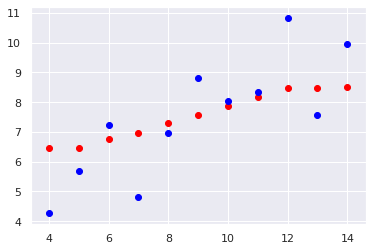

In [62]:
plt.scatter(x1, predictions, color='red')
plt.scatter(x1, y1, color='blue')

# Getting a model for Dataset II

In [63]:
automl_q2 = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='/tmp/autosklearn/q2_tmp',
    output_folder='/tmp/autosklearn/q2_out',
)

automl_q2.fit(x2.values.reshape(-1, 1), y2.values.reshape(-1, 1), dataset_name='quartet2')

/usr/local/lib/python3.6/dist-packages/autosklearn/automl.py:860: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Will change shape via np.ravel().
  y = self._check_y(y)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-09-24 21:51:18,068:AutoMLSMBO(1)::quartet2] Could not find meta-data directory /usr/local/lib/python3.6/dist-packages/autosklearn/metalearning/files/r2_regression_dense
[WARNING] [2019-09-24 21:51:18,097:EnsembleBuilder(1):quartet2] No models better than random - using Dummy Score!
[WARNING] [2019-09-24 21:51:18,113:EnsembleBuilder(1):quartet2] No models better than random - using Dummy Score!


/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty

/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty

AutoSklearnRegressor(delete_output_folder_after_terminate=True,
           delete_tmp_folder_after_terminate=True,
           disable_evaluator_output=False, ensemble_memory_limit=1024,
           ensemble_nbest=50, ensemble_size=50, exclude_estimators=None,
           exclude_preprocessors=None, get_smac_object_callback=None,
           include_estimators=None, include_preprocessors=None,
           initial_configurations_via_metalearning=25, logging_config=None,
           ml_memory_limit=3072, output_folder='/tmp/autosklearn/q2_out',
           per_run_time_limit=30, resampling_strategy='holdout',
           resampling_strategy_arguments=None, seed=1, shared_mode=False,
           smac_scenario_args=None, time_left_for_this_task=120,
           tmp_folder='/tmp/autosklearn/q2_tmp')

In [64]:
predictions2 = automl_q2.predict(x2.values.reshape(-1, 1))

In [65]:
print("R2 score:", sklearn.metrics.r2_score(y2.values.reshape(-1, 1), predictions2))

R2 score: 0.9999417389081203


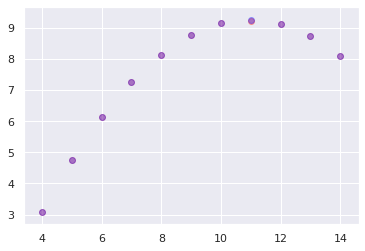

In [75]:
plt.scatter(x2, predictions2, color='red', alpha=0.3)
plt.scatter(x2, y2, color='blue', alpha=0.3)

# Getting a model for Dataset III

In [69]:
automl_q3 = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='/tmp/autosklearn/q3_tmp',
    output_folder='/tmp/autosklearn/q3_out',
)

automl_q3.fit(x3.values.reshape(-1, 1), y3.values.reshape(-1, 1), dataset_name='quartet3')

/usr/local/lib/python3.6/dist-packages/autosklearn/automl.py:860: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Will change shape via np.ravel().
  y = self._check_y(y)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-09-24 22:00:06,293:AutoMLSMBO(1)::quartet3] Could not find meta-data directory /usr/local/lib/python3.6/dist-packages/autosklearn/metalearning/files/r2_regression_dense
[WARNING] [2019-09-24 22:00:06,314:EnsembleBuilder(1):quartet3] No models better than random - using Dummy Score!
[WARNING] [2019-09-24 22:00:06,333:EnsembleBuilder(1):quartet3] No models better than random - using Dummy Score!


/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty

[WARNING] [2019-09-24 22:00:33,113:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2019-09-24 22:00:33,113:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty

/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty

AutoSklearnRegressor(delete_output_folder_after_terminate=True,
           delete_tmp_folder_after_terminate=True,
           disable_evaluator_output=False, ensemble_memory_limit=1024,
           ensemble_nbest=50, ensemble_size=50, exclude_estimators=None,
           exclude_preprocessors=None, get_smac_object_callback=None,
           include_estimators=None, include_preprocessors=None,
           initial_configurations_via_metalearning=25, logging_config=None,
           ml_memory_limit=3072, output_folder='/tmp/autosklearn/q3_out',
           per_run_time_limit=30, resampling_strategy='holdout',
           resampling_strategy_arguments=None, seed=1, shared_mode=False,
           smac_scenario_args=None, time_left_for_this_task=120,
           tmp_folder='/tmp/autosklearn/q3_tmp')

In [70]:
predictions3 = automl_q3.predict(x3.values.reshape(-1, 1))

In [71]:
print("R2 score:", sklearn.metrics.r2_score(y3.values.reshape(-1, 1), predictions3))

R2 score: 0.6278849712873833


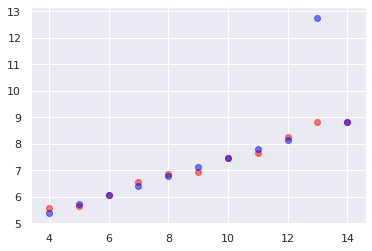

In [74]:
plt.scatter(x3, predictions3, color='red', alpha=0.5)
plt.scatter(x3, y3, color='blue', alpha=0.5)

# Getting a model for Dataset IV

In [76]:
automl_q4 = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='/tmp/autosklearn/q4_tmp',
    output_folder='/tmp/autosklearn/q4_out',
)

automl_q4.fit(x4.values.reshape(-1, 1), y4.values.reshape(-1, 1), dataset_name='quartet4')

/usr/local/lib/python3.6/dist-packages/autosklearn/automl.py:860: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Will change shape via np.ravel().
  y = self._check_y(y)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-09-24 22:03:45,742:AutoMLSMBO(1)::quartet4] Could not find meta-data directory /usr/local/lib/python3.6/dist-packages/autosklearn/metalearning/files/r2_regression_dense
[WARNING] [2019-09-24 22:03:45,782:EnsembleBuilder(1):quartet4] No models better than random - using Dummy Score!
[WARNING] [2019-09-24 22:03:45,804:EnsembleBuilder(1):quartet4] No models better than random - using Dummy Score!


/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-09-24 22:03:47,821:EnsembleBuilder(1):quartet4] No models better than random - using Dummy Score!


/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-09-24 22:03:49,827:EnsembleBuilder(1):quartet4] No models better than random - using Dummy Score!


/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-09-24 22:03:51,836:EnsembleBuilder(1):quartet4] No models better than random - using Dummy Score!


/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty

/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty

/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty

AutoSklearnRegressor(delete_output_folder_after_terminate=True,
           delete_tmp_folder_after_terminate=True,
           disable_evaluator_output=False, ensemble_memory_limit=1024,
           ensemble_nbest=50, ensemble_size=50, exclude_estimators=None,
           exclude_preprocessors=None, get_smac_object_callback=None,
           include_estimators=None, include_preprocessors=None,
           initial_configurations_via_metalearning=25, logging_config=None,
           ml_memory_limit=3072, output_folder='/tmp/autosklearn/q4_out',
           per_run_time_limit=30, resampling_strategy='holdout',
           resampling_strategy_arguments=None, seed=1, shared_mode=False,
           smac_scenario_args=None, time_left_for_this_task=120,
           tmp_folder='/tmp/autosklearn/q4_tmp')

R2 score: 0.18443515465522253


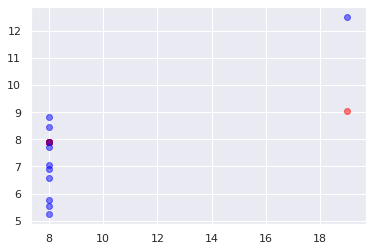

In [77]:
predictions4 = automl_q4.predict(x4.values.reshape(-1, 1))
print("R2 score:", sklearn.metrics.r2_score(y4.values.reshape(-1, 1), predictions4))
_ = plt.scatter(x4, predictions4, color='red', alpha=0.5)
_ = plt.scatter(x4, y4, color='blue', alpha=0.5)